# Star Wars Survey Analysis

This project is interested in analysing the answers provided by fans of the Star Wars franchise.

## Read in the data

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
# Displaying all columns 
pd.set_option('display.max_rows', 1200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Exploring the data

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

* The last 5 columns contains demographic information on the survey participants.
* The first 33 columns deals with the star wars survey.
* Some rows have null values.

In [4]:
star_wars.shape

(1187, 38)

The dataset contains 1187 rows and 38 columns

In [5]:
star_wars_columns = star_wars.columns
for column in star_wars_columns:
    print(column)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Which character shot first?
Are you familiar with the Expanded Universe?
Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
Do you consider yourself to be a fan of the Star Trek franchise?
Gender
Age
Household Income
Education
Locat

In [6]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

__Converting the columns in cell 17 and 18 to boolean:__

In [9]:
bool_dict = {'Yes': True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_dict)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_dict)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('----------------------------------------------------')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
----------------------------------------------------
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning the Star Wars series columns

Converting the seen or not seen Star Wars episode column to boolean and changing the column name

Changing the column names

In [10]:
col_dict = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
          'Unnamed: 4': 'seen_2',
          'Unnamed: 5': 'seen_3',
          'Unnamed: 6': 'seen_4',
          'Unnamed: 7': 'seen_5',
          'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename(columns=col_dict)
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


__Converting the columns to boolean__

In [11]:
import numpy as np

star_wars['seen_1'] = star_wars['seen_1'].map({'Star Wars: Episode I  The Phantom Menace': True, np.NaN:False})
star_wars['seen_2'] = star_wars['seen_2'].map({'Star Wars: Episode II  Attack of the Clones': True, np.NaN:False})
star_wars['seen_3'] = star_wars['seen_3'].map({'Star Wars: Episode III  Revenge of the Sith': True, np.NaN:False})
star_wars['seen_4'] = star_wars['seen_4'].map({'Star Wars: Episode IV  A New Hope': True, np.NaN:False})
star_wars['seen_5'] = star_wars['seen_5'].map({'Star Wars: Episode V The Empire Strikes Back': True, np.NaN:False})
star_wars['seen_6'] = star_wars['seen_6'].map({'Star Wars: Episode VI Return of the Jedi': True, np.NaN:False})

In [12]:
star_wars.iloc[:,3:9].head(5)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


__STAR WARS FRANCHISE SERIES MAP:__
* Star Wars: Episode I  The Phantom Menace : seen_1
* Star Wars: Episode II  Attack of the Clones : seen_2
* Star Wars: Episode III  Revenge of the Sith : seen_3
* Star Wars: Episode IV  A New Hope : seen_4
* Star Wars: Episode V The Empire Strikes Back : seen_5
* Star Wars: Episode VI Return of the Jedi : seen_6

If the survey participant has seen one then it is true otherwise it is false

## Converting the survey participant rating columns to float type

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Changing the column names of star wars ranking to more sutiable names

In [16]:
for cols in star_wars.columns[9:15]:
    print(cols)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14


In [19]:
cols_dict = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
             'Unnamed: 10': 'ranking_2',
             'Unnamed: 11': 'ranking_3',
             'Unnamed: 12': 'ranking_4',
             'Unnamed: 13': 'ranking_5',
             'Unnamed: 14': 'ranking_6'
    }

star_wars = star_wars.rename(columns = cols_dict)

In [20]:
for cols in star_wars.columns[9:15]:
    print(cols)

ranking_1
ranking_2
ranking_3
ranking_4
ranking_5
ranking_6


ranking_1 stands for the first episode of the Star Wars franchise and so on.

## What is the highest ranking Star Wars movie?

In [30]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

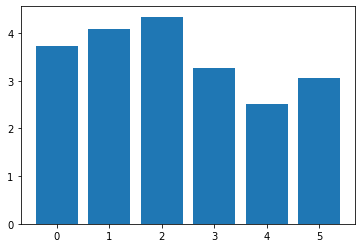

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(6), ranking_mean)

From the bar plot it seems that Star Wars: Episode V The Empire Strikes Back is rated highly compared to the rest.

## How many people has seen the Star Wars movies?

In [41]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

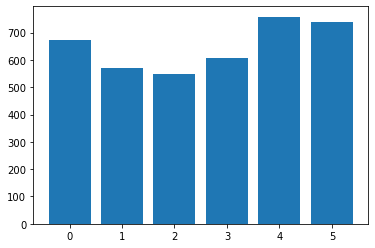

In [44]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

Star Wars: Episode V The Empire Strikes Back has more views which emphasise that it is the the most highly rated amongst the other Star Wars episodes.

In [46]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

## Analysing male viewers

In [47]:
male_avg_rank = males[males.columns[9:15]].mean()
male_avg_rank

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

<BarContainer object of 6 artists>

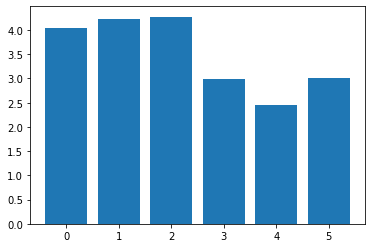

In [48]:
plt.bar(range(6), male_avg_rank)

* Among the males Star Wars 5 rank highest followed by Star Wars 4 then Star Wars 6.
* Star Wars 3 rank lowest amongst males

## Which Star Wars movie was viewed most by males?

In [51]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

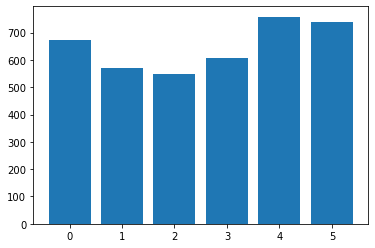

In [50]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

Star Wars episode 5 was seen most by males followed by episodes 6 and 1.
Although Star Wars episode 1 was the least favourite among males it had a high view of 673.

## Analysing female viewers

In [54]:
female_avg_rank = females[females.columns[9:15]].mean()
female_avg_rank

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

<BarContainer object of 6 artists>

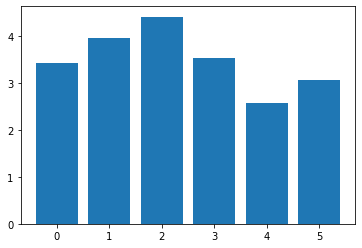

In [55]:
plt.bar(range(6), female_avg_rank)

Star Wars episode 4 was is the most favourite among females and episode 3 is the least fovourite.

In [56]:
females[females.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

<BarContainer object of 6 artists>

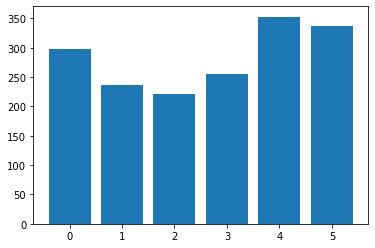

In [57]:
plt.bar(range(6), females[females.columns[3:9]].sum())

* Star Wars episode 5, 6 and 1 has the most viewer among females just as it was among males.
* Star Wars episode 3 was the least viewed by females.